In [21]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
iris_file = pd.read_csv('iris.data')
iris_file

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_file.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
corr_matrix=iris_file.corr()
corr_matrix

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [7]:
iris_file['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

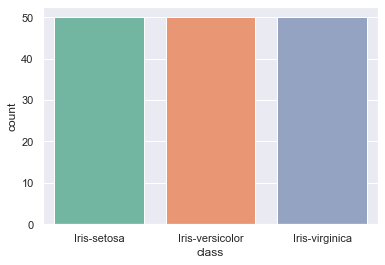

In [8]:
sns.set(style="darkgrid")
sns.countplot(data=iris_file,x="class",palette="Set2")

Text(0, 0.5, 'frequency')

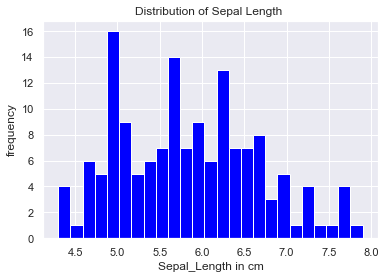

In [9]:

v1=iris_file['sepallength']
  
plt.hist(v1, bins = 25, color = "blue") 
plt.title("Distribution of Sepal Length ") 
plt.xlabel("Sepal_Length in cm") 
plt.ylabel("frequency") 

Text(0.5, 1.0, 'length vs Width')

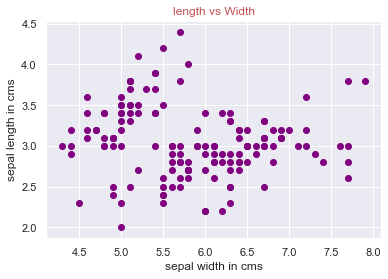

In [38]:
plt.scatter(iris_file['sepallength'],iris_file['sepalwidth'],marker='o',color = 'purple')
plt.ylabel("sepal length in cms")
plt.xlabel("sepal width in cms")
plt.title('length vs Width',color='r')

Text(0, 0.5, 'frequency')

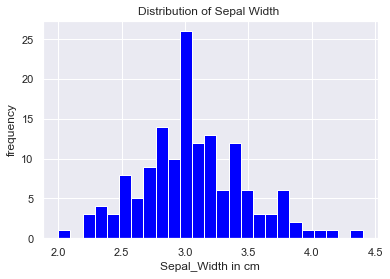

In [10]:
v1=iris_file['sepalwidth']
  
plt.hist(v1, bins = 25, color = "blue") 
plt.title("Distribution of Sepal Width ") 
plt.xlabel("Sepal_Width in cm") 
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

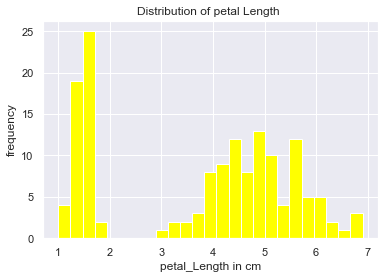

In [11]:
v1=iris_file['petallength']
  
plt.hist(v1, bins = 25, color = "yellow") 
plt.title("Distribution of petal Length ") 
plt.xlabel("petal_Length in cm") 
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

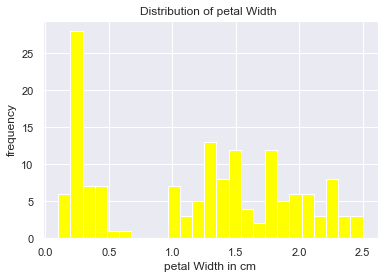

In [12]:
v1=iris_file['petalwidth']
  
plt.hist(v1, bins = 25, color = "yellow") 
plt.title("Distribution of petal Width ") 
plt.xlabel("petal Width in cm") 
plt.ylabel("frequency")

In [13]:
col_names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_file[col_names]
y = iris_file['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 1.00


In [33]:
gnb.predict([[4.7,3.1,1.3,0.2]]) 

array(['Iris-virginica'], dtype='<U15')

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('accuracy on test data :',metrics.accuracy_score(y_test, y_pred))


accuracy on test data : 0.9736842105263158


In [32]:
knn.predict([[4.7,3.1,1.3,0.2]]) #predicting a new sample

array(['Iris-virginica'], dtype=object)